In [3]:
import nltk
from nltk.tokenize import word_tokenize

import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedSet

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

plt.style.use(style="seaborn")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\koren\AppData\Local\Temp\ipykernel_12516\2655311324.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style="seaborn")


In [ ]:
#Loading the file and cleaning the data

In [4]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [7]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
df.isna().value_counts()

label  text   label_num
False  False  False        5171
dtype: int64

In [ ]:
#Q2 - Data tokenization

In [10]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

#data preprocessing
def preprocess(text, stem=False):
    text_cleaning_re = "@\S+|[^A-Za-z0-9]: \S+|subject: \S+|nbsp|[^A-Za-z0-9] | [^A-Za-z0-9]"
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()

    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token)) # fixing word grammer
            else:
                tokens.append(token)
    return " ".join(tokens)

df["preprocess_text"] = df.text.apply(preprocess)
df.head()

,label,text,label_num,preprocess_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,methanol meter follow note gave monday 4 3 00 ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,nom january 9 2001 see attached file 09 xls hp...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,retreat ho ho ho around wonderful time year ne...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,windows office cheap main trending abasements ...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,springs deal book teco pvr revenue understandi...


In [ ]:
#Q3 - EDA-Showing the token's frequency (60 words)

C:\Users\koren\AppData\Local\Temp\ipykernel_12516\3908219380.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vc1 = ham_tok_words.apply(pd.Series).stack().value_counts().to_frame()
C:\Users\koren\AppData\Local\Temp\ipykernel_12516\3908219380.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vc2 = spam_tok_words.apply(pd.Series).stack().value_counts().to_frame()


<AxesSubplot: >

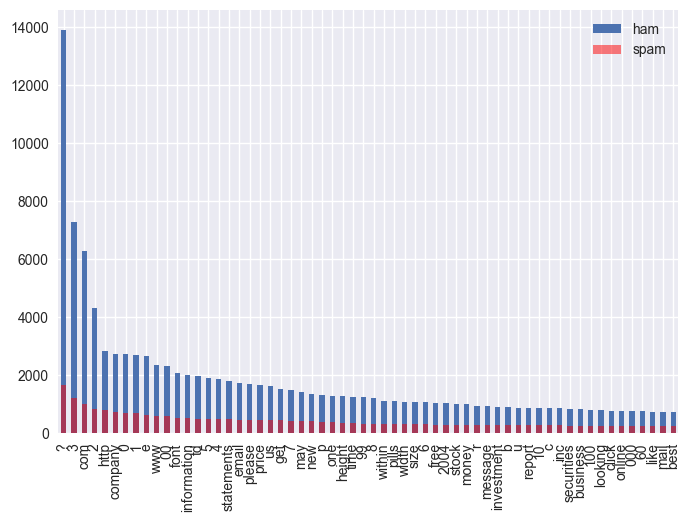

In [11]:
NUM_OF_BINS=60
ham_tok_words = df[df.label == "ham"].preprocess_text.apply(str.strip).apply(word_tokenize)
spam_tok_words = df[df.label == "spam"].preprocess_text.apply(str.strip).apply(word_tokenize)

vc1 = ham_tok_words.apply(pd.Series).stack().value_counts().to_frame()
vc1.rename(columns = {0:'ham'}, inplace = True)
vc2 = spam_tok_words.apply(pd.Series).stack().value_counts().to_frame()
vc2.rename(columns = {0:'spam'}, inplace = True)

ax = vc1.head(NUM_OF_BINS).plot(kind="bar")
plt.figure(1, figsize=(16,8))
plt.subplot(1,1,1)
vc2.head(NUM_OF_BINS).plot(alpha=0.5, color="red", ax=ax, kind="bar")


In [ ]:
#Q4-Q6

In [ ]:
#Count vectorization to extract features from text

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
count= cv.fit_transform(df['preprocess_text'])

In [13]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

dtv = cv.transform(df['preprocess_text'])

dtv = dtv.toarray()
print(f"Tokens/Features: {dtv.shape[1]}")

No.of Tokens:  49796
Tokens/Features: 49796


In [15]:
X = df.loc[:, 'text']
y = df.loc[:, 'label_num']

In [ ]:
#Split into Training data and Test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
count= cv.fit_transform(X_train)

In [18]:
dtv = cv.transform(X_train)
type(dtv)

scipy.sparse._csr.csr_matrix

In [19]:
dtv = dtv.toarray()

In [ ]:
#Building a classification model-Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()
RandomForest.fit(dtv, y_train)

RandomForestClassifier()

In [21]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
train_dtv = cv.transform(X_train)
train_dtv = train_dtv.toarray()
pred_test = RandomForest.predict(test_dtv)
pred_train=RandomForest.predict(train_dtv)

In [ ]:
#Assessment of model accuracy by retrieving metrics such as precision, accuracy, f1, recall

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       744
           1       0.97      0.94      0.95       291

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      1208

    accuracy                           1.00      4136
   macro avg       1.00      1.00      1.00      4136
weighted avg       1.00      1.00      1.00      4136



In [23]:
#Q7-Q8

In [ ]:
#Testing 4 different models: logistic regression, KNN, decision tree, SVM

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
models = {
    "Logistic Regr.": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)},
    "KNN": {"model":KNeighborsClassifier()},
    "Decision Tree": {"model":DecisionTreeClassifier()},
    "SVM (Linear)": {"model":LinearSVC()},
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(dtv, y_train)



C:\Users\koren\anaconda3\envs\NLP\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Q8- Checking the assessment of the accuracy of the models and Comparison between the accuracy results of the models

In [43]:
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test)])

In [44]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy
0,Logistic Regr.,0.973913
1,SVM (Linear),0.963285
2,Decision Tree,0.944928
3,KNN,0.865700


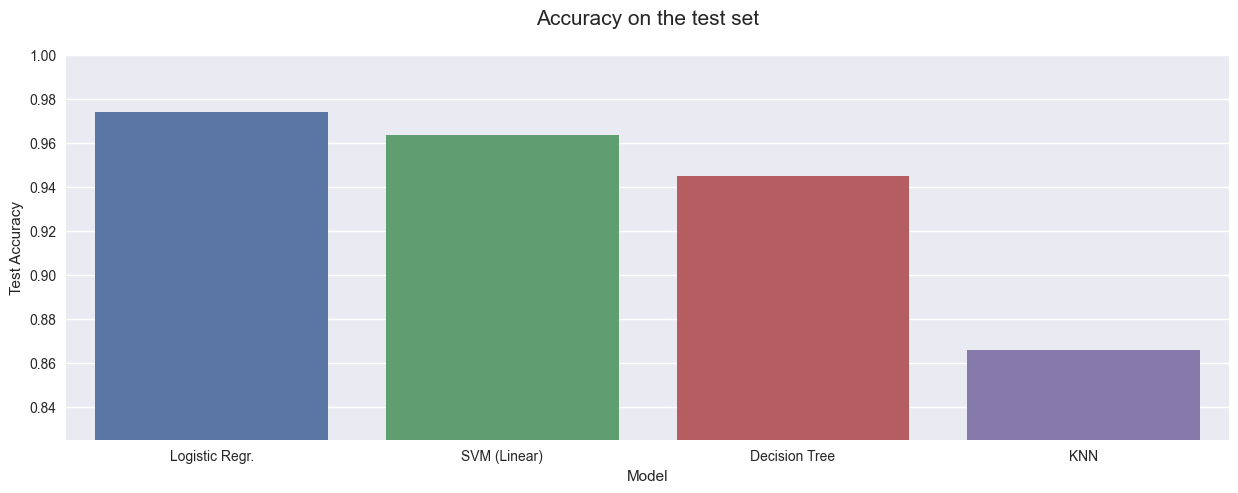

In [45]:
import seaborn as sns
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

In [ ]:
#Q9

In [ ]:
# It can be seen that the logistic regression model is the model with the highest level of accuracy. It can also be seen that the knn and decision tree models are mainly used for multiclass classification problems. received the lowest accuracy scores. The logistic regression model is used to solve binary problems and is therefore suitable for the problem presented in this data frame.